In [1]:
# import scikit-allel
import allel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Extract the AF DP QUAL information from the variant file
variant = allel.read_vcf('/Users/cmdb/qbb2021-answers/qbio_week2/variant_effect.vcf', 
                         fields = ['AF', "DP", "QUAL", "ANN"])

In [3]:
#Extract the DP 
DP = variant["variants/DP"]

#Extract the QUAL
QUAL = variant["variants/QUAL"]

#Extract the AF as a list
AF = [variant["variants/AF"][i][0] for i in range(len(variant["variants/AF"]))]

#Extract the predicted variant effect
ANN = variant['variants/ANN']
effect = [" ".join(i.strip("|").split("|")).split()[1:7] for i in ANN] #only select the 2nd to 7th features


In [27]:
#Make the effect (a list of lists) into one list 
#and then a dic with keys each effect and values of that occurance
effect_list = [
    x[0] for x in effect
]


In [35]:
effect_dict = dict((effect, effect_list.count(effect)) for effect in set(effect_list))
effect_dict_sort = {k: v for k, v in sorted(effect_dict.items(), key=lambda item: item[1])}

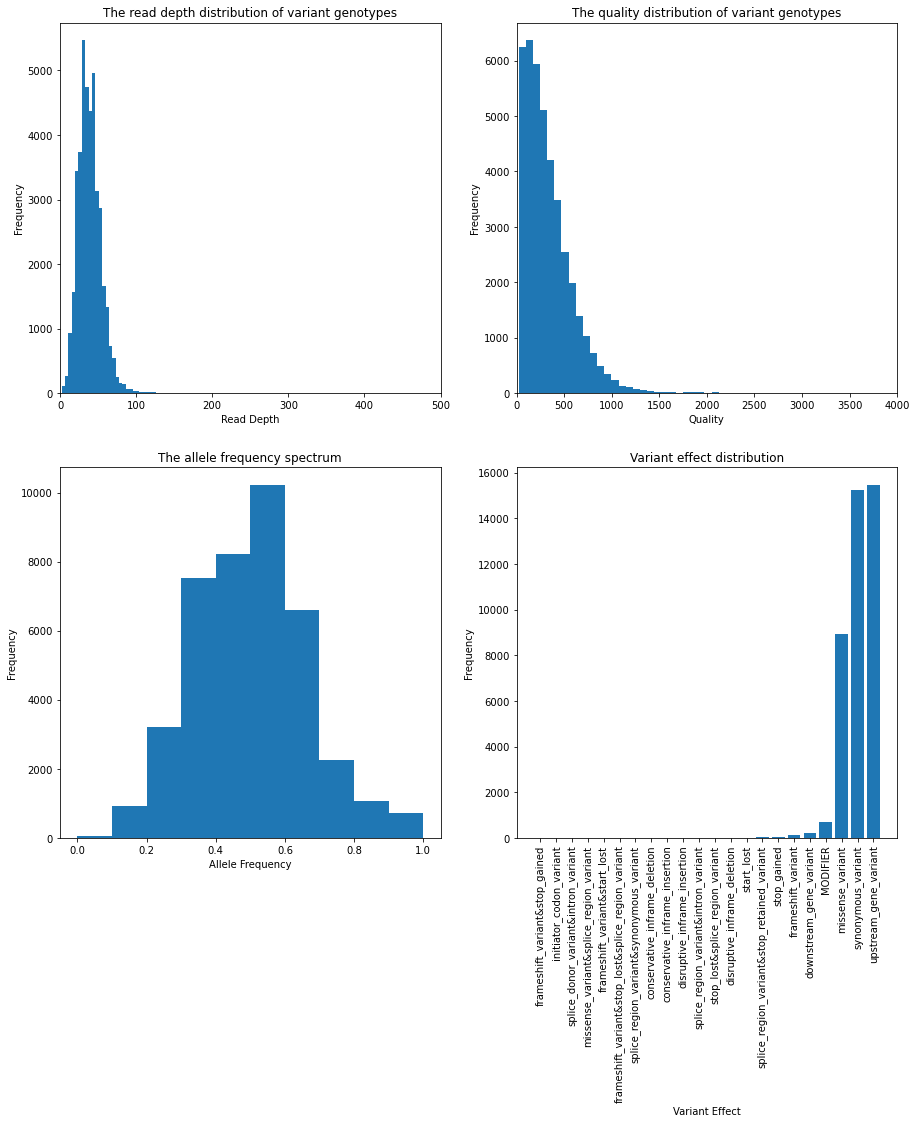

In [39]:
#Plotting
fig, axs = plt.subplots(2, 2, figsize =(15,15))
axs[0, 0].hist(DP, bins = 1000)
axs[0, 0].set_xlim (0,500)
axs[0, 0].set_xlabel("Read Depth")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title('The read depth distribution of variant genotypes')



axs[0, 1].hist(QUAL, bins = 1000)
axs[0, 1].set_xlim (0,4000)
axs[0, 1].set_xlabel("Quality")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title('The quality distribution of variant genotypes')

axs[1, 0].hist(AF, bins =10)
axs[1, 0].set_xlabel("Allele Frequency")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title('The allele frequency spectrum')

axs[1, 1].bar(effect_dict_sort.keys(), height = effect_dict_sort.values())
axs[1, 1].set_xlabel("Variant Effect")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title('Variant effect distribution')
plt.xticks(rotation = 90)
plt.savefig("Explanatory data analysis")
plt.show()
